**Houston**

In [30]:
import pandas as pd
import matplotlib as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#datasets
from sklearn.datasets import load_boston
#preprocessing
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
#metrics
from sklearn.metrics import mean_squared_error
#models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

In [6]:
X, y = load_boston(return_X_y=True)
dataset = pd.DataFrame(X, columns=load_boston().feature_names)

In [7]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bcb8feb50>,
      dtype=object)

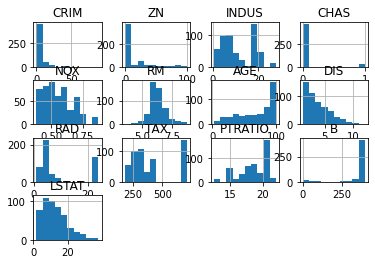

In [8]:
dataset.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc888a590>,
      dtype=object)

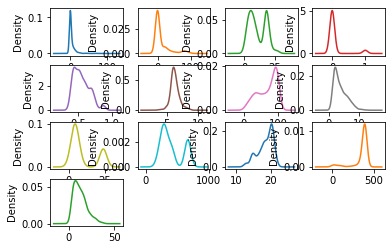

In [12]:
dataset.plot(kind='density', subplots=True, layout=(4, 4), legend=False, sharex=False)

**Summary**
  * feature selection and removeing the most correlated attributes
  * normalizing the dataset
  * standardizing

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [14]:
models = []
models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("ridge", Ridge()))
models.append(("en", ElasticNet()))
models.append(("neighbor", KNeighborsRegressor()))
models.append(("tree", DecisionTreeRegressor()))
models.append(("svr", SVR()))

In [18]:
results = []
names = []
for (name, model) in models:
  kfold = KFold(n_splits=num_folds, random_state=10)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print ("Name: {2} mean: {0} std {1}".format(cv_results.mean(), cv_results.std(), name))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

Name: LR mean: -24.6577033673901 std 9.239461454891948
Name: LASSO mean: -29.503909143155305 std 9.682356800157159
Name: ridge mean: -24.846657795311707 std 9.559334168813042
Name: en mean: -28.808324571085063 std 9.203132940855609
Name: neighbor mean: -41.40529765853659 std 9.375430878821192
Name: tree mean: -20.989751829268293 std 11.584578117017427
Name: svr mean: -70.1087572238431 std 29.34561204555733


[Text(0, 0, 'LR'),
 Text(0, 0, 'LASSO'),
 Text(0, 0, 'ridge'),
 Text(0, 0, 'en'),
 Text(0, 0, 'neighbor'),
 Text(0, 0, 'tree'),
 Text(0, 0, 'svr')]

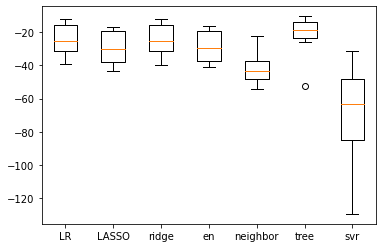

In [21]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results)
ax.set_xticklabels(names)



In [25]:
pipelines = []
pipelines.append(("scaledLR", Pipeline([("scaler", StandardScaler()), ("LR", LinearRegression())])))
pipelines.append(("scaledRidge", Pipeline([("scaler", StandardScaler()), ("Ridge", Ridge())])))
pipelines.append(("scaledEn", Pipeline([("scaler", StandardScaler()), ("EN", ElasticNet())])))
pipelines.append(("scaledNeighbors", Pipeline([("scaler", StandardScaler()), ("Neighbors", KNeighborsRegressor())])))
pipelines.append(("scaledsvr", Pipeline([("scaler", StandardScaler()), ("svr", SVR())])))
pipelines.append(("scaledtree", Pipeline([("scaler", StandardScaler()), ("svr", DecisionTreeRegressor())])))

results = []
names = []
for (name, model) in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=10)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print ("Name: {2} mean: {0} std {1}".format(cv_results.mean(), cv_results.std(), name))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

Name: scaledLR mean: -24.657703367390027 std 9.239461454891922
Name: scaledRidge mean: -24.652734799317088 std 9.273075760369155
Name: scaledEn mean: -32.0191207638411 std 13.24547333065221
Name: scaledNeighbors mean: -25.015972219512193 std 11.41966298560534
Name: scaledsvr mean: -33.89847883181062 std 16.617995303978336
Name: scaledtree mean: -20.8412506097561 std 11.000982129255117


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[Text(0, 0, 'scaledLR'),
 Text(0, 0, 'scaledRidge'),
 Text(0, 0, 'scaledEn'),
 Text(0, 0, 'scaledNeighbors'),
 Text(0, 0, 'scaledsvr'),
 Text(0, 0, 'scaledtree')]

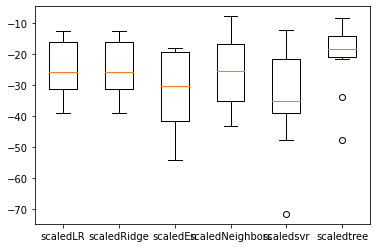

In [26]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
plt.pyplot.boxplot(results)
ax.set_xticklabels(names)

In [29]:
scaler = StandardScaler().fit_transform(x_train)
k_values = {
    "n_neighbors": [3, 5, 7, 9, 11]
}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=10)
grid = GridSearchCV(model, k_values, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaler, y_train)
grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'n_neighbors': 3}

**Ensemble**


In [31]:
pipelines = []
pipelines.append(("scaledAB", Pipeline([("scaler", StandardScaler()), ("AB", AdaBoostRegressor())])))
pipelines.append(("scaledGB", Pipeline([("scaler", StandardScaler()), ("GB", GradientBoostingRegressor())])))
pipelines.append(("scaledRF", Pipeline([("scaler", StandardScaler()), ("RF", RandomForestRegressor())])))
pipelines.append(("scaledET", Pipeline([("scaler", StandardScaler()), ("ET", ExtraTreesRegressor())])))

results = []
names = []
for (name, model) in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=10)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print ("Name: {2} mean: {0} std {1}".format(cv_results.mean(), cv_results.std(), name))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Name: scaledAB mean: -13.923383524219862 std 5.3444207474163115


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Name: scaledGB mean: -9.16978020781752 std 4.006894960979697


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Name: scaledRF mean: -10.745222076402435 std 4.61459104952213


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Name: scaledET mean: -9.78007005890243 std 4.979548119279083


{'boxes': [<matplotlib.lines.Line2D at 0x7f6bbac22510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bbac28590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bbac2f5d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bbac2f090>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6bbac22b10>,
  <matplotlib.lines.Line2D at 0x7f6bbabdd0d0>]}

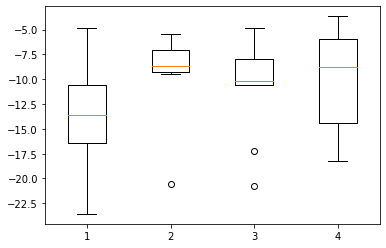

In [32]:
plt.pyplot.boxplot(results)